In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


<h>LOADING THE DATA</h>

In [3]:
# Read data from URL
data = pd.read_csv("http://bit.ly/w-data")

<h>DATA PREPROCESSING</h>

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe().style.background_gradient()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h>CORRELATION</h>

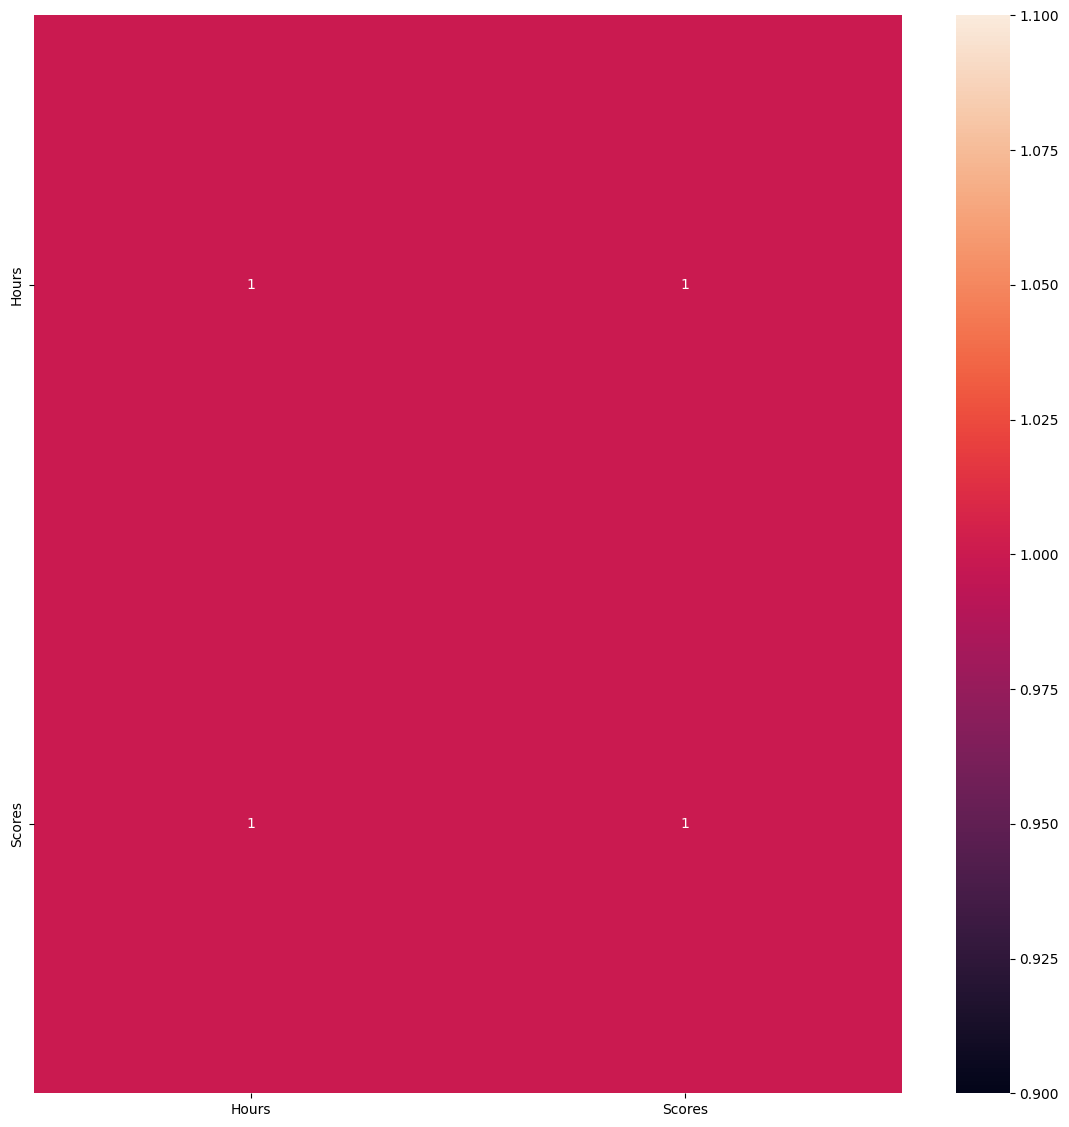

In [8]:
plt.figure(figsize=(14, 14))
corr=data.corr().round()
corr=np.abs(corr)
sns_plot=sns.heatmap(corr, annot=True)

<Axes: xlabel='Hours', ylabel='Scores'>

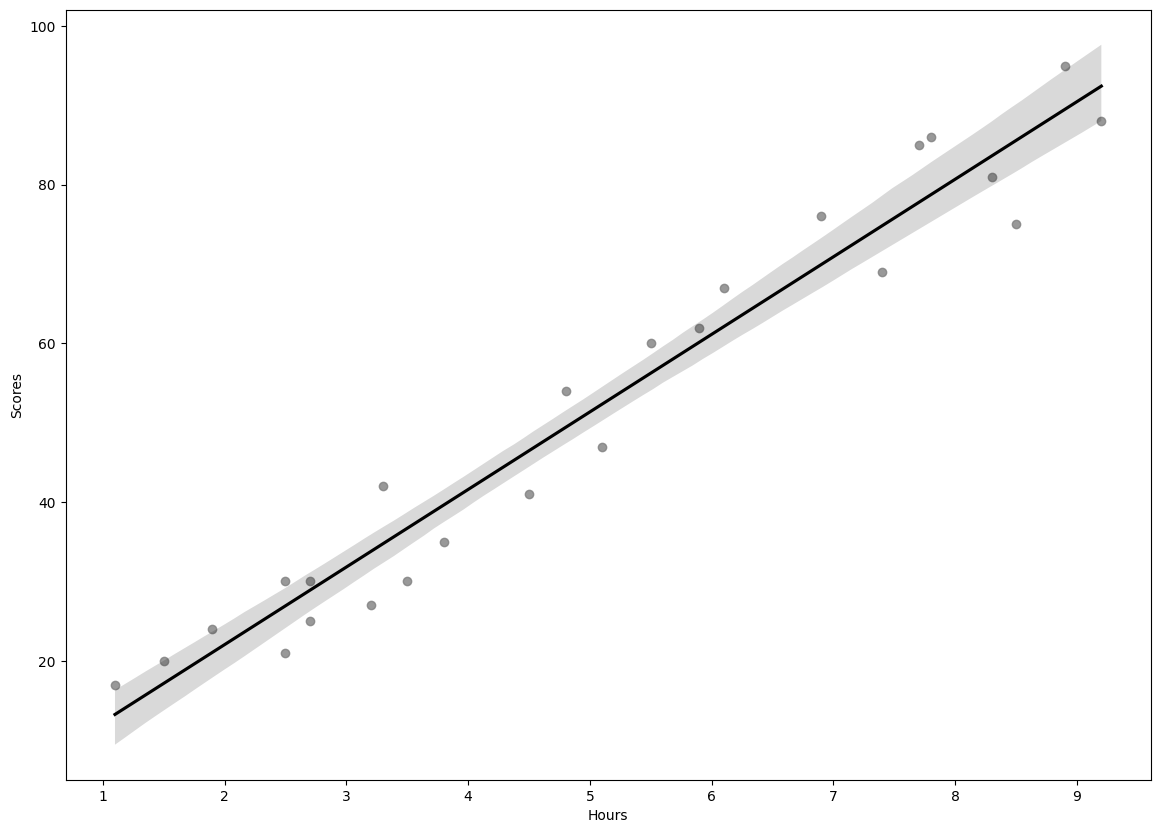

In [9]:
plt.figure(figsize=(14, 10))
sns.regplot(data=data, x="Hours", y="Scores",
            color='gray', line_kws={'color': 'black'})


In [10]:
# Split the data into training and testing sets
x = data.iloc[:, :-1]  # First column and all rows
y = data.iloc[:, -1]   # Last column and all rows
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


In [11]:
# Create and train a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)


LinearRegression()

Text(0, 0.5, 'Scores')

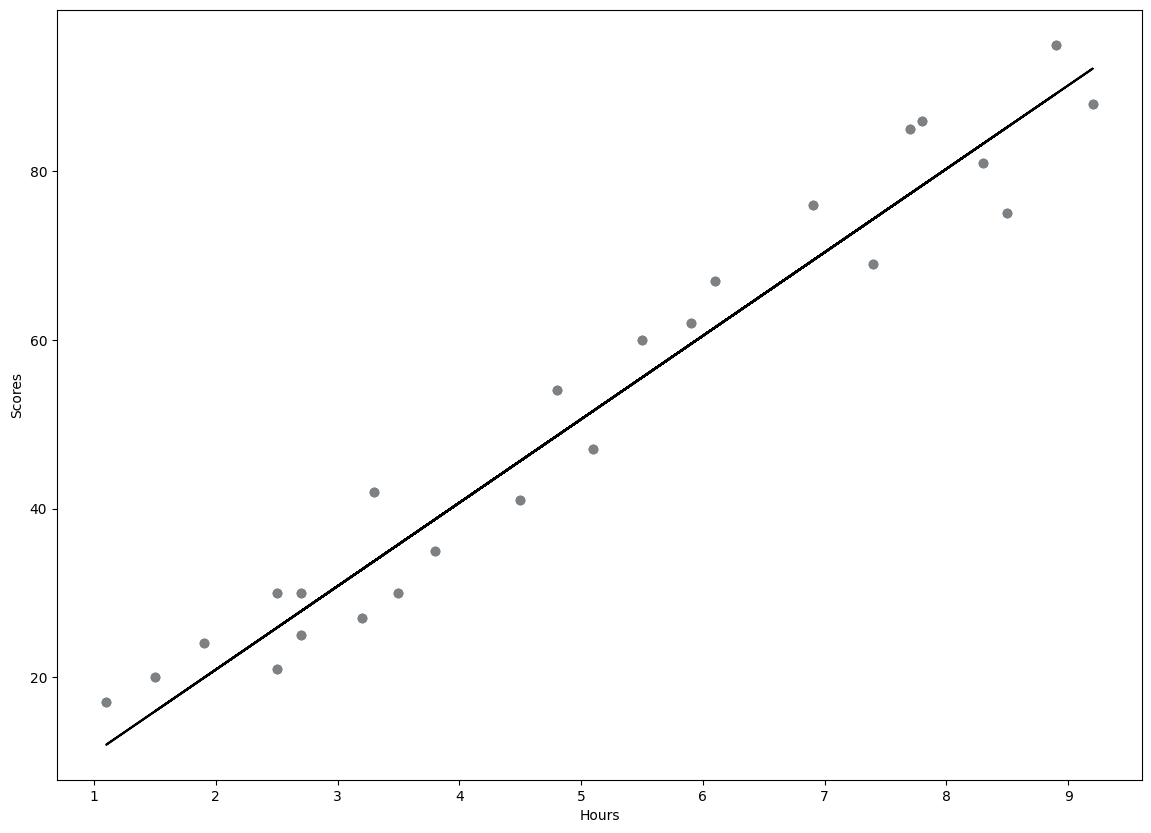

In [12]:
line = linear_reg.coef_*x+linear_reg.intercept_
plt.figure(figsize=(14, 10))
plt.scatter(x, y)
plt.scatter(x,y, c='grey', label='Specific Data Point')

plt.plot(x, line, color='black', label='Linear Regression Line')
plt.xlabel("Hours")
plt.ylabel("Scores")


In [13]:
# Calculate accuracy on the test set
accuracy = linear_reg.score(x_test, y_test)

In [14]:
# Make predictions on the test set
y_pred = linear_reg.predict(x_test)

print(f"Accuracy: {accuracy}")


Accuracy: 0.956640847232559


Text(0, 0.5, 'Scores')

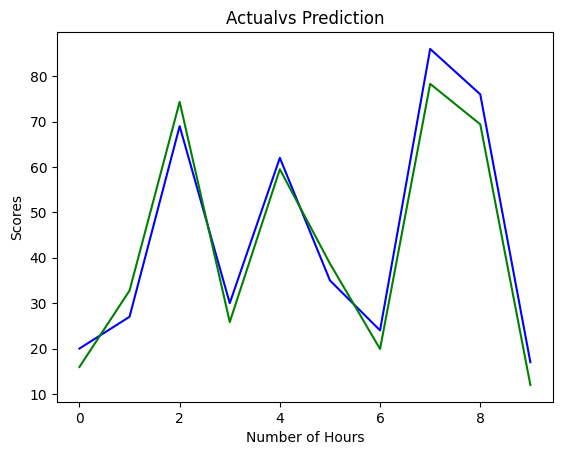

In [15]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actualvs Prediction')
plt.xlabel('Number of Hours')
plt.ylabel('Scores')


In [16]:
print('PREDICT,ACTUAL')
for i, j in zip(y_pred, y_test):
    print(f'i={i},j={j}')


PREDICT,ACTUAL
i=15.947761797680114,j=20
i=32.77394722792941,j=27
i=74.34452299678061,j=69
i=25.845517933120874,j=30
i=59.49788879361947,j=62
i=38.71260090919387,j=35
i=19.90686425185642,j=24
i=78.30362545095691,j=86
i=69.39564492906023,j=76
i=11.98865934350381,j=17


In [17]:
print('MSE :',metrics.mean_absolute_percentage_error(y_pred,y_test))
print('R2_score :',metrics.r2_score(y_pred,y_test))

MSE : 0.16179357249105886
R2_score : 0.9554256587556441
